
# Project 4: Mental Health and Screen Time
Does the amount of screen time (using phones, computers, and tablets) a person spends at age 16 affect their levels of depression and anxiety at age 18? Data and data dictionary can be found on Blackboard on the projects tab.
Dataset:   screenTime.zip
Data Owner: Natalie Thurlby, Data Science Specialist, Jean Golding Institute


In [64]:
import pandas as pd
import os

In [65]:
data_path = '../data/'
raw_maps = pd.read_csv(os.path.join(data_path, 'maps-synthetic-data-v1.1.csv'))
dict_file = os.path.join(data_path, 'synthetic_data_dictionary.csv')
raw_dictionary = pd.read_csv(dict_file)

In [66]:
raw_maps.head()

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,1,1,synthetic,NaN,3.0,30,59.294132,181.602831,107.0,NaN,...,0.0,Yes,Yes,often,No,"Yes, Some Days",Other,"Yes, Every Day",Female,A
1,2,2,synthetic,NaN,9.0,26,NaN,NaN,85.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,B
2,3,3,synthetic,NaN,3.0,24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Yes, Some Days","Yes, Every Day",Other,Male,A
3,4,4,synthetic,No,NaN,22,49.812426,160.224186,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Male,A
4,5,5,synthetic,No,8.0,31,62.270030,191.703227,132.0,Yes,...,NaN,NaN,NaN,often,No,"Yes, Some Days","Yes, Every Day","Yes, Every Day",Female,A


In [67]:
raw_maps.columns

Index(['Unnamed: 0', 'X', 'flag', 'comp_bed_9', 'mat_dep', 'mat_age',
       'weight_16', 'height_16', 'iq', 'comp_noint_bed_16', 'comp_int_bed_16',
       'talk_phon_wend', 'text_wend', 'talk_mob_wend', 'comp_wend',
       'musi_wend', 'read_wend', 'work_wend', 'alon_wend', 'draw_wend',
       'play_wend', 'tv_wend', 'out_win_wend', 'out_sum_wend', 'tran_wend',
       'talk_phon_week', 'text_week', 'talk_mob_week', 'comp_week',
       'musi_week', 'read_week', 'work_week', 'alon_week', 'draw_week',
       'play_week', 'tv_week', 'out_win_week', 'out_sum_week', 'tran_week',
       'pat_pres_10', 'pat_pres_8', 'pat_pres', 'num_home', 'mat_anx_1',
       'mat_anx_18m', 'mat_anx_8m', 'agg_score', 'emot_cruel', 'phys_cruel',
       'mat_anx_0m', 'pat_ses', 'mat_ses', 'pat_edu', 'mat_edu', 'parity',
       'dep_band_15', 'dep_band_13', 'dep_band_10', 'dep_band_07',
       'anx_band_15', 'anx_band_13', 'anx_band_10', 'anx_band_07', 'exercise',
       'child_bull', 'phone_14_wend', 'phone_14_

In [68]:
raw_maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13734 entries, 0 to 13733
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13734 non-null  int64  
 1   X                  13734 non-null  int64  
 2   flag               13734 non-null  object 
 3   comp_bed_9         8174 non-null   object 
 4   mat_dep            11145 non-null  float64
 5   mat_age            13326 non-null  object 
 6   weight_16          5351 non-null   float64
 7   height_16          5364 non-null   float64
 8   iq                 7288 non-null   float64
 9   comp_noint_bed_16  471 non-null    object 
 10  comp_int_bed_16    2570 non-null   object 
 11  talk_phon_wend     4850 non-null   object 
 12  text_wend          4841 non-null   object 
 13  talk_mob_wend      4834 non-null   object 
 14  comp_wend          4839 non-null   object 
 15  musi_wend          4831 non-null   object 
 16  read_wend          483

In [69]:
raw_maps.describe()

,Unnamed: 0,X,mat_dep,weight_16,height_16,iq,agg_score,parity,secd_diag,prim_diag,panic_score,dep_thoughts,dep_score
count,13734.000000,13734.000000,11145.000000,5351.000000,5364.000000,7288.000000,10714.000000,12544.000000,4513.000000,4513.000000,4513.000000,1805.000000,4513.000000
mean,6867.500000,6867.500000,5.415882,61.720509,169.286372,103.672201,9.947639,0.843033,0.417682,1.301573,0.043209,1.932410,0.437625
std,3964.808633,3964.808633,4.611888,12.003745,8.533072,16.682292,1.996768,1.009716,1.514679,3.200335,0.320880,1.327217,0.928123
min,1.000000,1.000000,0.000000,32.300000,139.512169,45.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3434.250000,3434.250000,2.000000,53.785885,163.317270,92.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6867.500000,6867.500000,4.000000,59.890308,168.875015,103.000000,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10300.750000,10300.750000,8.000000,67.309938,175.171323,115.000000,11.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
max,13734.000000,13734.000000,28.000000,126.029499,201.519622,152.000000,15.000000,22.000000,9.000000,12.000000,4.000000,5.000000,4.000000


In [70]:
raw_maps.mat_age.unique()

array(['30', '26', '24', '22', '31', '36', '27', '21', '32', '< 16', '33',
       '25', '16', '37', '34', '35', '18', '29', '23', '20', '17', '28',
       '38', nan, '40', '19', '39', '41', '>43', '42', '43'], dtype=object)

In [71]:
raw_maps.mat_age.value_counts()

29      1145
28      1130
30      1036
27      1006
26      1002
25       934
31       894
32       750
24       733
23       642
33       582
34       495
22       440
35       381
20       354
21       315
36       290
19       251
37       222
18       160
38       129
17       114
39        79
40        67
41        56
16        54
42        28
43        18
>43       13
< 16       6
Name: mat_age, dtype: int64

In [72]:
raw_maps.iq.unique()

array([107.,  85.,  nan, 132., 106.,  98., 108., 113., 104., 119., 143.,
        87., 110.,  81.,  71., 148., 111.,  95.,  76., 105., 135., 131.,
       102., 112.,  97., 137., 122.,  84., 117.,  74.,  53., 120.,  92.,
       118., 114., 115., 139., 127., 125., 134.,  83.,  80.,  79.,  89.,
       121., 124.,  88., 103., 133., 100.,  93., 101.,  78., 116.,  86.,
       128., 109.,  77.,  99.,  90.,  64.,  82.,  68.,  70.,  67., 126.,
        69.,  75., 123., 149.,  94.,  91.,  72.,  96.,  51.,  73.,  57.,
       130.,  61., 140., 129.,  66.,  54.,  63., 136., 138.,  50., 147.,
       141.,  65.,  49., 142., 150., 146., 144.,  55.,  62.,  48.,  58.,
        59., 152.,  56.,  45., 145.])

In [73]:
raw_maps.child_bull.unique()

array(['No', nan, 'Yes'], dtype=object)

In [74]:
raw_maps.child_bull.value_counts()

No     4076
Yes     913
Name: child_bull, dtype: int64

In [75]:
raw_maps.sex.value_counts()

Female    7102
Male      6632
Name: sex, dtype: int64

In [76]:
raw_maps.prim_diag.unique()

array([ 0., nan,  5., 10.,  9.,  1., 12., 11.,  8.,  2.,  6.,  7.,  4.])

In [77]:
raw_maps.prim_diag.value_counts()

0.0     3573
1.0      240
11.0     181
10.0     134
5.0      101
2.0       99
12.0      74
6.0       66
8.0       22
4.0       11
9.0        6
7.0        6
Name: prim_diag, dtype: int64

In [78]:
raw_maps.weight_16.unique()

array([59.29413192,         nan, 49.81242632, ..., 59.28760905,
       58.07583154, 70.7329131 ])

In [79]:
raw_maps.weight_16.value_counts()

32.300000     2
126.029499    2
59.294132     1
67.644590     1
57.330336     1
             ..
56.391429     1
82.107926     1
62.901127     1
60.796512     1
70.732913     1
Name: weight_16, Length: 5349, dtype: int64

In [80]:
raw_maps.apply(pd.Series.value_counts)

,Unnamed: 0,X,flag,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0.0,NaN,NaN,NaN,NaN,1396.0,NaN,NaN,NaN,NaN,NaN,...,3463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,1136.0,NaN,NaN,NaN,NaN,NaN,...,488.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,1025.0,NaN,NaN,NaN,NaN,NaN,...,299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,NaN,1094.0,NaN,NaN,NaN,NaN,NaN,...,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,NaN,958.0,NaN,NaN,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
~0.5%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
~15%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
~3%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dictionary

In [81]:
raw_dictionary

,agVariable Name,Variable ALSPAC Name,Variable Description,Variable Type,Administered to,Age of child at administration,ALSPAC Measure,ALSPAC Responses,Processing Details,Reference Document
0,agg_score,f596,Aggression score of partnership,Discrete,Mother,Aged 8 months,Derived by ALSPAC. See Processing Details,NaN,Aggression score was determined by three quest...,NaN
1,alon_week,ccs1006,Average time child spent per day doing things ...,Ordinal,Child,Aged 198 months,"""How much time on average do you spend each da...",Not at all,"The category ""Not at all"" was collapsed into t...",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 1 hour,NaN,NaN
3,,,NaN,NaN,NaN,NaN,NaN,1-2 hours,NaN,NaN
4,,,NaN,NaN,NaN,NaN,NaN,3 or more hours,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
208,,,NaN,NaN,NaN,NaN,NaN,3 or more hours,NaN,NaN
209,work_wend,ccs1027,Average time child spent per day doing school ...,Ordinal,Child,Aged 198 months,How much time on average do you spend each day...,Not at all,"The category ""Not at all"" was combined with th...",NaN
210,,,NaN,NaN,NaN,NaN,NaN,Less than 1 hour,NaN,NaN
211,NaN,,NaN,NaN,NaN,NaN,NaN,1-2 hours,NaN,NaN


In [82]:
raw_dictionary.columns

Index(['agVariable Name', 'Variable ALSPAC Name', 'Variable Description',
       'Variable Type', 'Administered to', 'Age of child at administration',
       'ALSPAC Measure', 'ALSPAC Responses', 'Processing Details',
       'Reference Document'],
      dtype='object')

# Start Plotting Data
Does the amount of screen time (using phones, computers, and tablets) a person spends at age 16 affect their levels of depression and anxiety at age 18?

### Outcome:
Depression levels at 18:
**has_dep_diag**:
- Child has ICD-10 diagnosis of depression
- 17.5
- Calculated from their Revised Computerised Interview Schedule (CIS-R) score. See CIS-R Descriptive Summary for more information.

**dep_score**
- Child's depression score on CIS-R
- Aged around 17.5
- Higher scores indicate higher levels of depressive symptomatology.  They were scored following: +1 if less/no enjoyment with life during the past week, +1 if depressed for >3day in past week, +1 if depressed for >3hr in any day of past week, +1 if unable to be cheered up. See CIS-R Descriptive Summary for details.

**dep_thoughts**
- Child's number of depressive thoughts on CIS-R.
- 17.5
- Higher scores indicate higher levels of depressive thoughts. There were scored following: +1 if feelings of needless guilt, +1 if feelings of low self-esteem, +1 if feelings of hopelessness, +1 if felt that life not worth living, +1 if thought seriously about suicide. See CIS-R Descriptive Summary for details.

**secd_diag**
- Child's secondary diagnosis in accordance with ICD-10.
- 17.5
- Secondary diagnosis was determined using the CIS-R. 0 = none, 1 = mild neurosis, 2 = mild GAD, 3 = OCD, 4 = mixed anxiety and depression, 5 = specific phobia, 6 = social phobia, 7 = agoraphobia, 8 = GAD, 9 = panic disorder, 10 = mild depression, 11 = moderate depression, 12 = severe depression


### Input:
198 -> 16.5
Screen time at 16

**talk_mob_week**
- 16.5
- Average time child spent per day talking on a mobile phone on a typical weekday

**talk_mob_wend**
- 16.5
- Average time child spent per day talking on a mobile phone on a typical weekend day

**text_week**
- no age given
- Average time child spent per day texting on a typical weekday

**text_wend**
- 16.5
- Average time child spent per day texting on a typical weekend day

**tv_week**
- 16.5
- -Average time child spent per day watching TV on a typical weekday

**tv_wend**
- 16.5
- Average time child spent per day watching TV on a typical weekend day

**comp_week**
- 16.5
- Average time child spent per day using a computer on a typical weekday

**comp_wend**
- 16.5
- Average time child spent per day using a computer on a typical weekend day

In [83]:
# drop data that's not directly related to screen time and depression/anxiety
columns = ['has_dep_diag',
           'dep_score',
           'dep_thoughts',
           'secd_diag',
           'talk_mob_week',
           'talk_mob_wend',
           'text_week',
           'text_wend',
           'tv_week',
           'tv_wend',
           'comp_week',
           'comp_wend']
df_raw = raw_maps[columns]
df_raw.head()


,has_dep_diag,dep_score,dep_thoughts,secd_diag,talk_mob_week,talk_mob_wend,text_week,text_wend,tv_week,tv_wend,comp_week,comp_wend
0,No ICD-10 diagnosis of depression,0.0,NaN,0.0,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,1-2 hours,1-2 hours
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Not at all,Not at all,Not at all,Not at all,1-2 hours,3 or more hours,1-2 hours,Less than 1 hour


In [84]:
#describe each column
for column in df_raw.columns:
    print(f'Value counts for column {column}:')
    column_data = df_raw[column]
    isna_sum = column_data.isna().sum()
    non_nil = df_raw[column].count()
    total = non_nil + isna_sum
    percent_not_nil = round(non_nil / total * 100)
    print(f'Not nan            {non_nil}')
    print(f'Nan                {isna_sum}')
    print(f'Percent not nil    {percent_not_nil}%')
    print(column_data.value_counts())
    print('\n')


Value counts for column has_dep_diag:
Not nan            4513
Nan                9221
Percent not nil    33%
 No ICD-10 diagnosis of depression    4124
Yes ICD-10 diagnosis of depression     389
Name: has_dep_diag, dtype: int64


Value counts for column dep_score:
Not nan            4513
Nan                9221
Percent not nil    33%
0.0    3463
1.0     488
2.0     299
3.0     163
4.0     100
Name: dep_score, dtype: int64


Value counts for column dep_thoughts:
Not nan            1805
Nan                11929
Percent not nil    13%
1.0    897
2.0    282
3.0    225
4.0    223
5.0     92
0.0     86
Name: dep_thoughts, dtype: int64


Value counts for column secd_diag:
Not nan            4513
Nan                9221
Percent not nil    33%
0.0    3980
1.0     246
8.0      94
4.0      62
5.0      44
2.0      43
9.0      22
6.0      19
7.0       3
Name: secd_diag, dtype: int64


Value counts for column talk_mob_week:
Not nan            5016
Nan                8718
Percent not nil    37%
Less 

In [85]:
#translate to numerical values
#for options https://pbpython.com/categorical-encoding.html
#one hot best for learning alg and to avoid that category 4 is 4x category 1!

# df orig has nan's
df_orig = df_raw
# replace nan with -1 -> to keep them recognisable
df_raw = df_raw.fillna(-1)

# make all columns a category -> even the numerical ones as they are not continous numbers
df_raw = df_raw.astype('category')
# use pd's codes to make them numeric -> -1 disappears this way
df = df_raw.apply(lambda x: x.cat.codes)
df.columns

Index(['has_dep_diag', 'dep_score', 'dep_thoughts', 'secd_diag',
       'talk_mob_week', 'talk_mob_wend', 'text_week', 'text_wend', 'tv_week',
       'tv_wend', 'comp_week', 'comp_wend'],
      dtype='object')

In [122]:
def scatter_plot(plot_kind, y_values, data, fig_col):
    data.plot(kind=plot_kind, x='tv_week', y=y_values, ax=axes[0, fig_col])
    data.plot(kind=plot_kind, x='tv_wend', y=y_values, ax=axes[1, fig_col])
    data.plot(kind=plot_kind, x='comp_week', y=y_values, ax=axes[2, fig_col])
    data.plot(kind=plot_kind, x='comp_wend', y=y_values, ax=axes[3, fig_col])
    data.plot(kind=plot_kind, x='talk_mob_week', y=y_values, ax=axes[4, fig_col])
    data.plot(kind=plot_kind, x='talk_mob_wend', y=y_values, ax=axes[5, fig_col])
    data.plot(kind=plot_kind, x='text_week', y=y_values, ax=axes[6, fig_col])
    data.plot(kind=plot_kind, x='text_wend', y=y_values, ax=axes[7, fig_col])

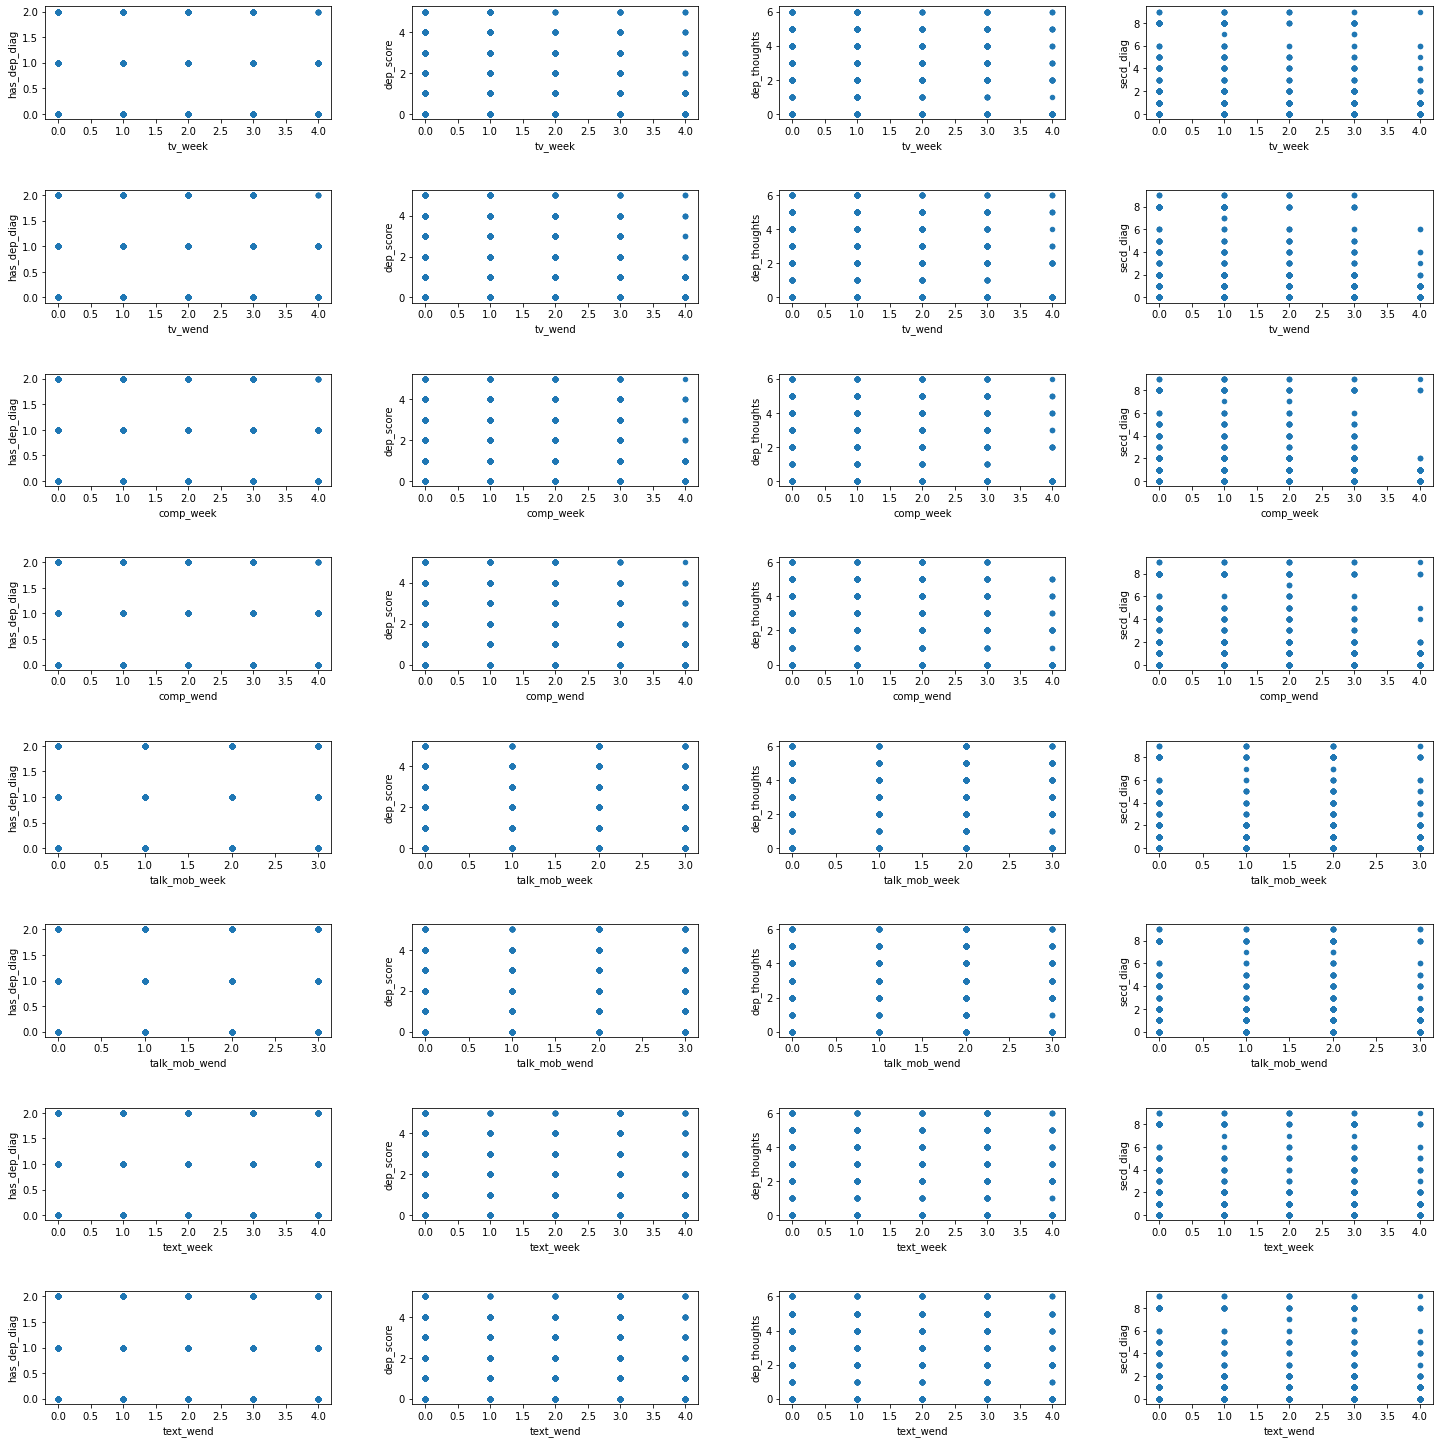

In [123]:
#plot
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 20]

fig, axes = plt.subplots(nrows=8, ncols=4)
fig.tight_layout(h_pad=5, w_pad=5)

kind = 'scatter'
scatter_plot(kind, 'has_dep_diag', df, 0)
scatter_plot(kind, 'dep_score', df, 1)
scatter_plot(kind, 'dep_thoughts', df, 2)
scatter_plot(kind, 'secd_diag', df, 3)

In [87]:
# Covariance matrix
cov_matrix = df.cov()
cov_matrix.head()

,has_dep_diag,dep_score,dep_thoughts,secd_diag,talk_mob_week,talk_mob_wend,text_week,text_wend,tv_week,tv_wend,comp_week,comp_wend
has_dep_diag,0.286198,0.405394,0.370844,0.412764,0.236108,0.223901,0.293529,0.282637,0.211259,0.206963,0.211863,0.213867
dep_score,0.405394,0.739026,0.743506,0.678135,0.319028,0.303803,0.395116,0.381350,0.285707,0.281987,0.292130,0.288434
dep_thoughts,0.370844,0.743506,1.213071,0.729359,0.262236,0.252224,0.320957,0.312732,0.239268,0.231175,0.241965,0.239833
secd_diag,0.412764,0.678135,0.729359,0.969525,0.286181,0.271795,0.352995,0.341275,0.260407,0.251040,0.265161,0.264416
talk_mob_week,0.236108,0.319028,0.262236,0.286181,1.012358,0.920968,1.176132,1.109937,0.797271,0.768994,0.805639,0.796428


<AxesSubplot:>

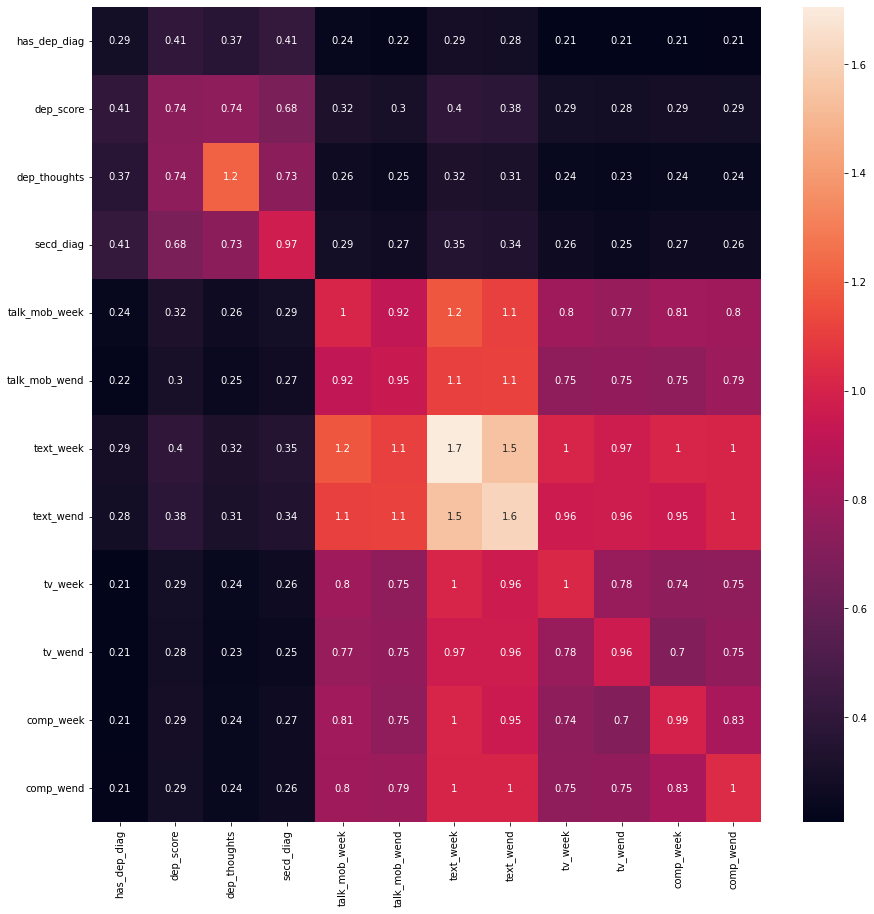

In [88]:
import seaborn as sns
% matplotlib inline
plt.rcParams["figure.figsize"] = [15, 15]
sns.heatmap(cov_matrix, annot=True)

<AxesSubplot:>

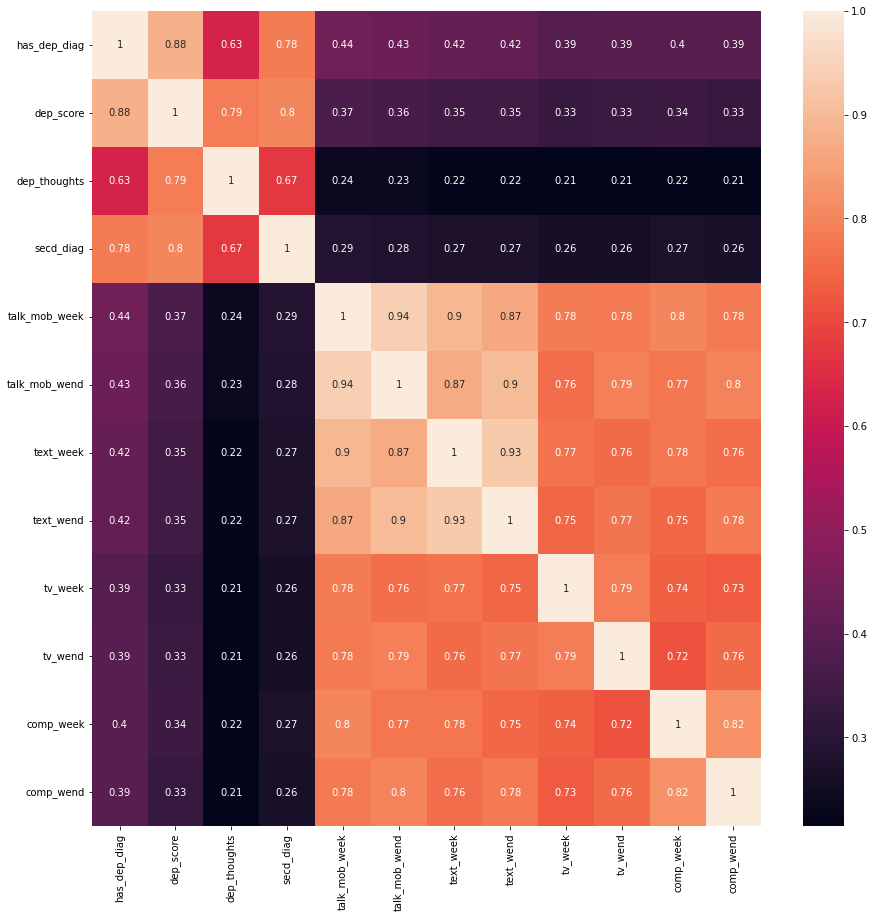

In [114]:
# Correlation matrix
corr_matrix = df.corr()
plt.rcParams["figure.figsize"] = [15, 15]
sns.heatmap(corr_matrix, annot=True)

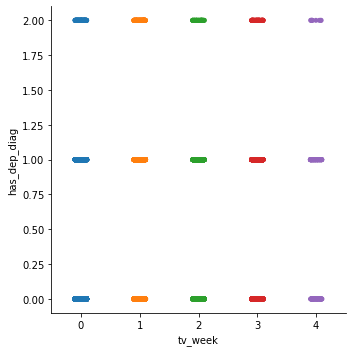

In [115]:
# Categorical Seaborn plots
import seaborn as sns

sns.catplot(x="tv_week", y="has_dep_diag", data=df)

KeyboardInterrupt: 

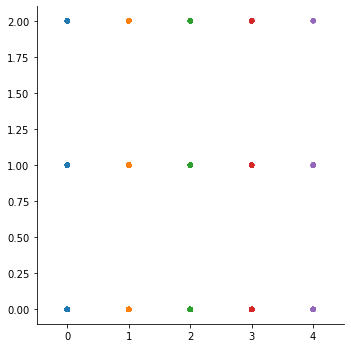

In [116]:
sns.catplot(x="tv_week", y="has_dep_diag", kind="swarm", data=df)

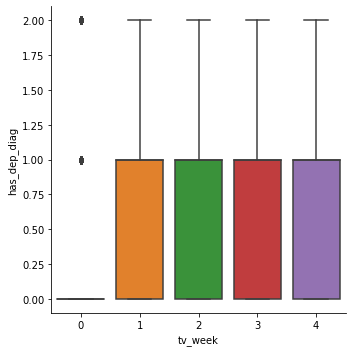

In [117]:
sns.catplot(x="tv_week", y="has_dep_diag", kind="box", data=df)

In [124]:
def boxplot(y_values, data, fig_col):
    sns.boxplot(x='tv_week', y=y_values, data=data, ax=axes[0, fig_col])
    sns.boxplot(x='tv_wend', y=y_values, data=data, ax=axes[1, fig_col])
    sns.boxplot(x='comp_week', y=y_values, data=data, ax=axes[2, fig_col])
    sns.boxplot(x='comp_wend', y=y_values, data=data, ax=axes[3, fig_col])
    sns.boxplot(x='talk_mob_week', y=y_values, data=data, ax=axes[4, fig_col])
    sns.boxplot(x='talk_mob_wend', y=y_values, data=data, ax=axes[5, fig_col])
    sns.boxplot(x='text_week', y=y_values, data=data, ax=axes[6, fig_col])
    sns.boxplot(x='text_wend', y=y_values, data=data, ax=axes[7, fig_col])


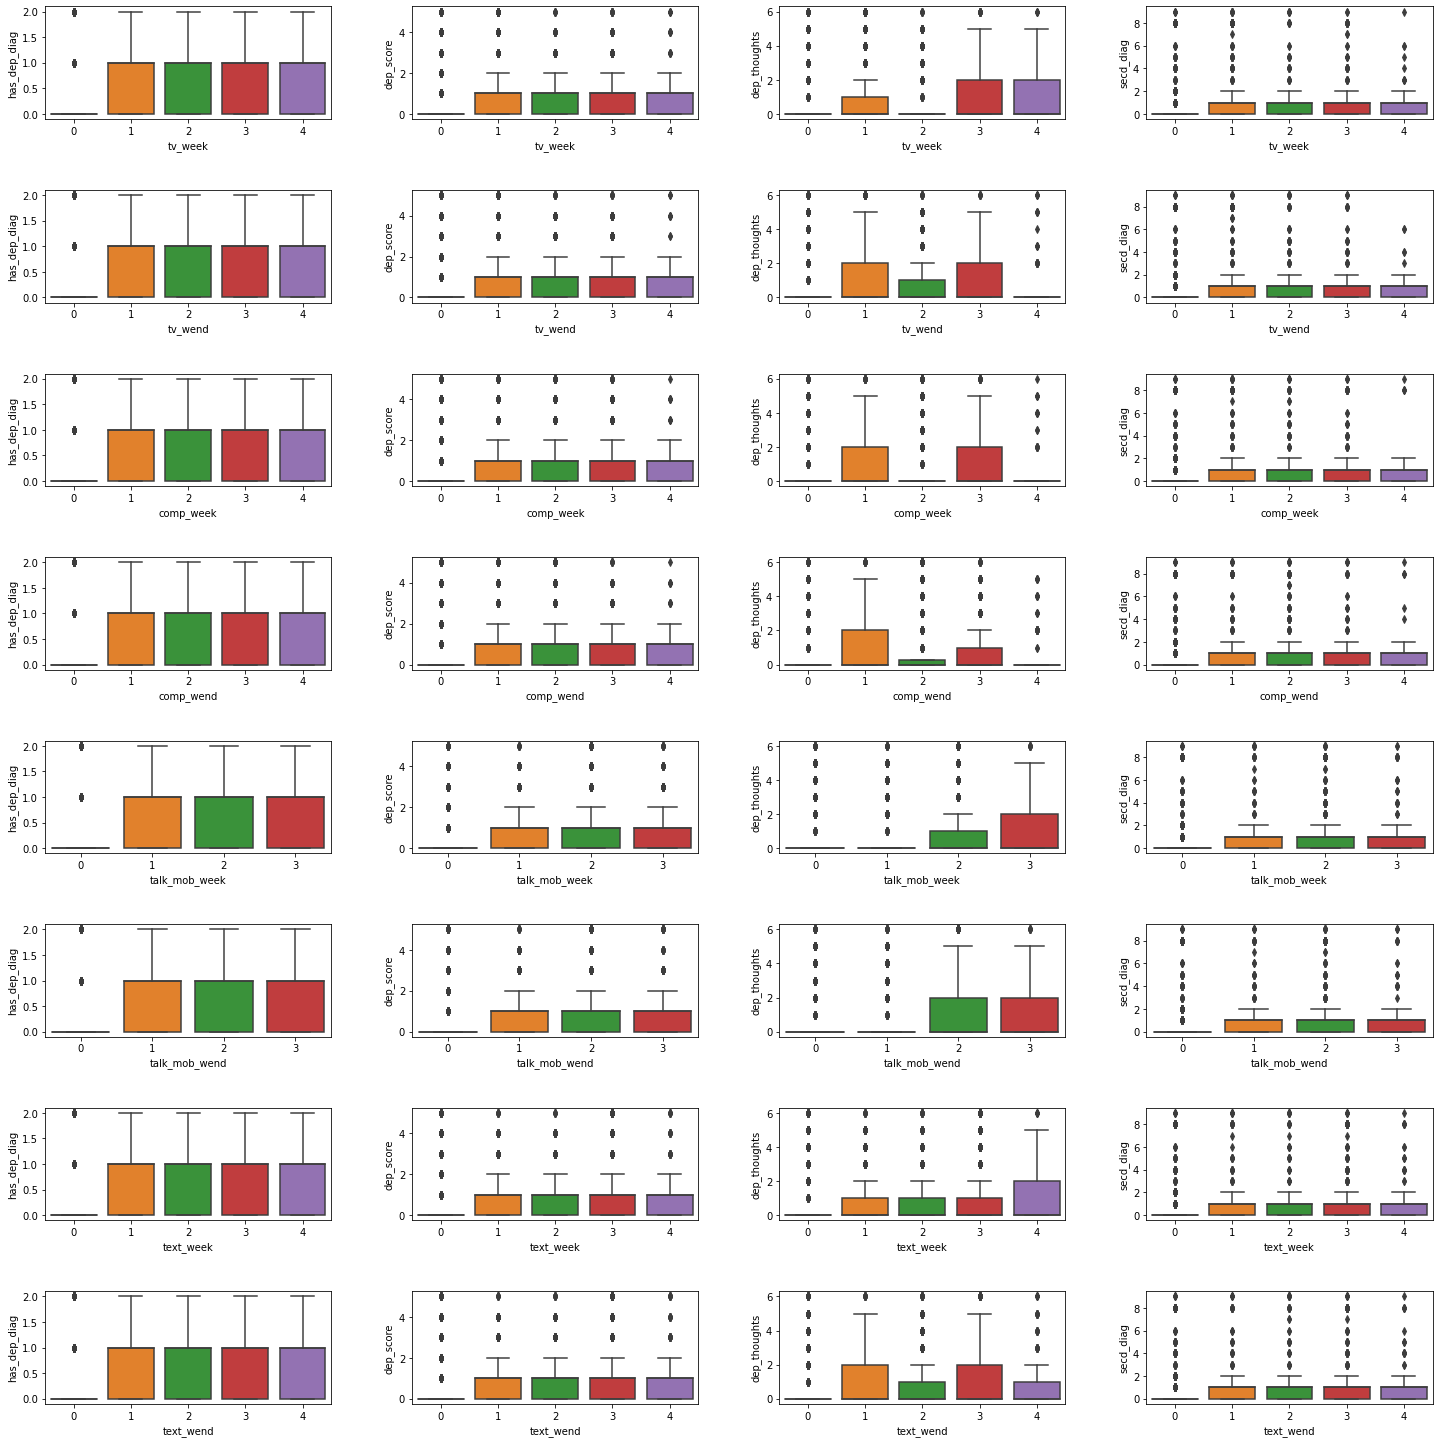

In [125]:
#Box plots for all the features
plt.rcParams["figure.figsize"] = [20, 20]

fig, axes = plt.subplots(nrows=8, ncols=4)
fig.tight_layout(h_pad=5, w_pad=5)

kind = 'box'

boxplot('has_dep_diag', df, 0)
boxplot('dep_score', df, 1)
boxplot('dep_thoughts', df, 2)
boxplot('secd_diag', df, 3)

# NAN Analysis


In [109]:
# count nan's in diagnosis - I don't think we should make up a diagnosis
diag_cols = ['has_dep_diag',
             'dep_score',
             'dep_thoughts',
             'secd_diag']
diag_df = df_orig[diag_cols]
diag_df = diag_df.assign(full_count=diag_df.apply(lambda x: x.count(), axis=1))
diag_df['full_count'].value_counts()

0    9221
3    2708
4    1805
Name: full_count, dtype: int64

In [110]:
diag_df.shape

(13734, 5)